# Lab program 7
## Develop a program to demonstrate the working of Linear Regression and Polynomial Regression. Use Boston Housing Dataset for Linear Regression and Auto MPG Dataset (for vehicle fuel efficiency prediction) for Polynomial Regression.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
def plot_results(X_test, y_test, y_pred, xlabel, ylabel, title):
    plt.scatter(X_test, y_test, color="blue", label="Actual")
    plt.plot(X_test, y_pred, color="red", label="Predicted")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()
    print(f"{title}")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))

In [3]:
def linear_regression():
    data = fetch_california_housing(as_frame=True)
    X, y = data.data[["AveRooms"]], data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression().fit(X_train, y_train)
    plot_results(X_test, y_test, model.predict(X_test), "AveRooms", "Median Home Value ($100K)", "Linear Regression - California Housing")

In [4]:
def polynomial_regression():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autompg/auto-mpg.data" #Replace with appropriate link
    cols = ["mpg", "cyl", "disp", "hp", "wt", "acc", "yr", "origin"]
    data = pd.read_csv(url, sep='\s+', names=cols, na_values="?").dropna()
    X, y = data[["disp"]], data["mpg"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
    model = make_pipeline(PolynomialFeatures(2), StandardScaler(),LinearRegression()).fit(X_train, y_train)
    plot_results(X_test, y_test, model.predict(X_test), "Displacement", "MPG","Polynomial Regression - Auto MPG")

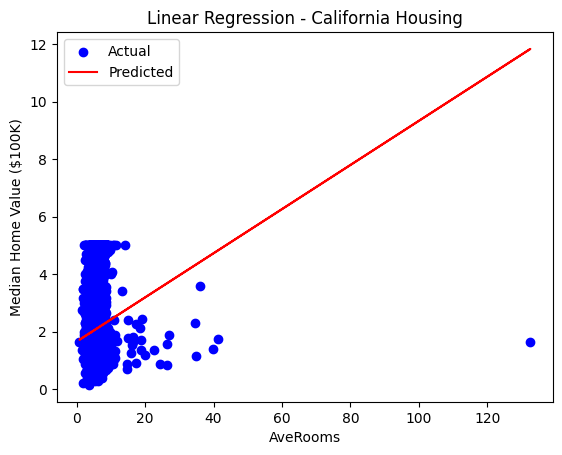

Linear Regression - California Housing
Mean Squared Error: 1.2923314440807299
R^2 Score: 0.013795337532284901


HTTPError: HTTP Error 404: Not Found

In [5]:
if __name__ == "__main__":
    linear_regression()
    polynomial_regression()